<h2>Data Cleaning and Formatting</h2>

In [1]:
import numpy as np

import pandas as pd
pd.set_option('display.max_columns', 60)

from IPython.core.pylabtools import figsize

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.size'] = 24

import seaborn as sns
sns.set(font_scale = 2)

from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('data/Energy_and_Water_Data_Disclosure_for_Local_Law_84_2017__Data_for_Calendar_Year_2016_.csv',\
                   encoding='cp1252')
data.shape

(11746, 60)

In [3]:
data.head(5)

,Order,Property Id,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Address 2,Postal Code,Street Number,Street Name,Borough,DOF Gross Floor Area,Primary Property Type - Self Selected,List of All Property Use Types at Property,Largest Property Use Type,Largest Property Use Type - Gross Floor Area (ft?),2nd Largest Property Use Type,2nd Largest Property Use - Gross Floor Area (ft?),3rd Largest Property Use Type,3rd Largest Property Use Type - Gross Floor Area (ft?),Year Built,Number of Buildings - Self-reported,Occupancy,Metered Areas (Energy),Metered Areas (Water),ENERGY STAR Score,Site EUI (kBtu/ft?),Weather Normalized Site EUI (kBtu/ft?),Weather Normalized Site Electricity Intensity (kWh/ft?),Weather Normalized Site Natural Gas Intensity (therms/ft?),Weather Normalized Source EUI (kBtu/ft?),Fuel Oil #1 Use (kBtu),Fuel Oil #2 Use (kBtu),Fuel Oil #4 Use (kBtu),Fuel Oil #5 & 6 Use (kBtu),Diesel #2 Use (kBtu),District Steam Use (kBtu),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft?),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft?),Source EUI (kBtu/ft?),Release Date,Water Required?,DOF Benchmarking Submission Status,Latitude,Longitude,Community Board,Council District,Census Tract,NTA
0,1,13286,201/205,13286,201/205,1013160001,1013160001,1037549,201/205 East 42nd st.,Not Available,10017,675,3 AVENUE,Manhattan,289356.0,Office,Office,Office,293447,Not Available,Not Available,Not Available,Not Available,1963,2,100,Whole Building,Not Available,Not Available,305.6,303.1,37.8,Not Available,614.2,Not Available,Not Available,Not Available,Not Available,Not Available,5.15506751E7,Not Available,Not Available,38139374.2,1.10827705E7,6962.2,0,6962.2,762051,Not Available,Not Available,619.4,05/01/2017 05:32:03 PM,No,In Compliance,40.750791,-73.973963,6.0,4.0,88.0,Turtle Bay-East Midtown ...
1,2,28400,NYP Columbia (West Campus),28400,NYP Columbia (West Campus),1021380040,1-02138-0040,1084198; 1084387;1084385; 1084386; 1084388; 10...,622 168th Street,Not Available,10032,180,FT WASHINGTON AVENUE,Manhattan,3693539.0,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),3889181,Not Available,Not Available,Not Available,Not Available,1969,12,100,Whole Building,Whole Building,55,229.8,228.8,24.8,2.4,401.1,Not Available,1.96248472E7,Not Available,Not Available,Not Available,-3.914148026E8,933073441,9330734.4,332365924,9.62613121E7,55870.4,51016.4,4854.1,3889181,Not Available,Not Available,404.3,04/27/2017 11:23:27 AM,No,In Compliance,40.841402,-73.942568,12.0,10.0,251.0,Washington Heights South ...
2,3,4778226,MSCHoNY North,28400,NYP Columbia (West Campus),1021380030,1-02138-0030,1063380,3975 Broadway,Not Available,10032,3975,BROADWAY,Manhattan,152765.0,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),231342,Not Available,Not Available,Not Available,Not Available,1924,1,100,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,0,0,0,231342,Not Available,Not Available,Not Available,04/27/2017 11:23:27 AM,No,In Compliance,40.840427,-73.940249,12.0,10.0,251.0,Washington Heights South ...
3,4,4778267,Herbert Irving Pavilion & Millstein Hospital,28400,NYP Columbia (West Campus),1021390001,1-02139-0001,1087281; 1076746,161 Fort Washington Ave,177 Fort Washington Ave,10032,161,FT WASHINGTON AVENUE,Manhattan,891040.0,Hos

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11746 entries, 0 to 11745
Data columns (total 60 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Order                                                       11746 non-null  int64  
 1   Property Id                                                 11746 non-null  int64  
 2   Property Name                                               11746 non-null  object 
 3   Parent Property Id                                          11746 non-null  object 
 4   Parent Property Name                                        11746 non-null  object 
 5   BBL - 10 digits                                             11735 non-null  object 
 6   NYC Borough, Block and Lot (BBL) self-reported              11746 non-null  object 
 7   NYC Building Identification Number (BIN)                    11746 non-null  object 
 

In [5]:
# Replace all occurrences of Not Available with numpy not a number
data = data.replace({'Not Available': np.nan})


# Iterate through the columns
for col in list(data.columns):
    # Select columns that should be numeric
    if ('ft?' in col or 'kBtu' in col or 'Metric Tons C02e' in col or 'kWh' in col or 'therms' in col or 'gal' in col or 'Score' in col):
        # Convert the data type to float
        data[col] = data[col].astype(float)

In [6]:
# Function to calculate missing values by column
def missing_values_table(df):
    # Total missing values
    mis_val = df.isnull().sum()

    # Percentage of missing values
    mis_val_percent = 100 * mis_val / len(df)

    # Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

    # Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(columns = {0: 'Missing Values', 1: '% of Total Values'})

    # Sort descending the table by percentage of missing values
    mis_val_table_ren_columns = mis_val_table_ren_columns[mis_val_table_ren_columns.iloc[:, 1] != 0].sort_values('% of Total Values',\
                                                                                                                 ascending=False).round(1)

    # Print some summary information
    print('Your selected dataframe has' + str(df.shape[1]) + 'columns.\n'
          'There are ' + str(mis_val_table_ren_columns.shape[0]) + ' columns that have missing values.')

    # Return the dataframe with missing information
    return mis_val_table_ren_columns

In [7]:
missing_df = missing_values_table(data)

Your selected dataframe has60columns.
There are 46 columns that have missing values.


In [8]:
# Get the columns with > 50% missing
missing_columns = list(missing_df[missing_df['% of Total Values'] > 50].index)
print('We will remove %d columns.' % len(missing_columns))

We will remove 11 columns.


In [9]:
# Drop the columns
data = data.drop(columns=list(missing_columns))

<h2>Exploratory Data Analysis</h2>

In [10]:
# Rename ENERGY STAR Score to score
data = data.rename(columns = {'ENERGY STAR Score': 'score'})

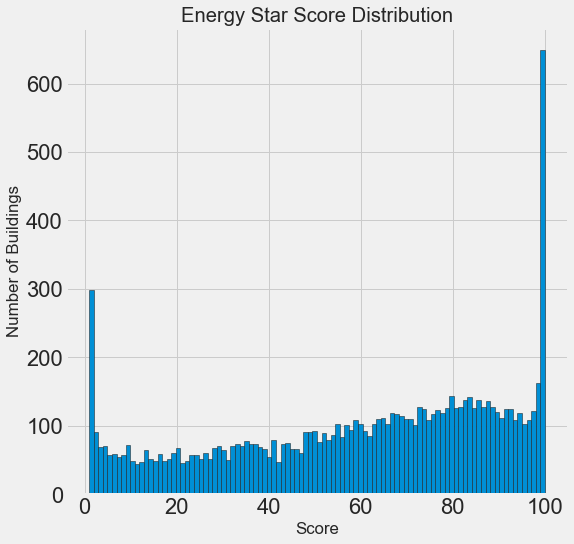

In [11]:
# Histogram fo the score
figsize(8, 8)

plt.style.use('fivethirtyeight')
plt.hist(data.score.dropna(), bins=100, edgecolor='k')
plt.xlabel('Score');
plt.ylabel('Number of Buildings');
plt.title('Energy Star Score Distribution');

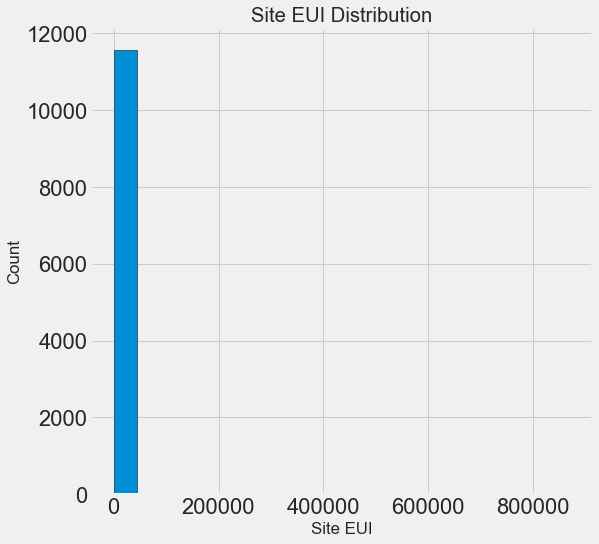

In [12]:
# Histogram Plot of Site EUI
figsize(8, 8)
plt.hist(data['Site EUI (kBtu/ft?)'].dropna(), bins=20, edgecolor='black')
plt.xlabel('Site EUI')
plt.ylabel('Count')
plt.title('Site EUI Distribution');

In [13]:
data['Site EUI (kBtu/ft?)'].describe()

count     11583.000000
mean        280.071484
std        8607.178877
min           0.000000
25%          61.800000
50%          78.500000
75%          97.600000
max      869265.000000
Name: Site EUI (kBtu/ft?), dtype: float64

In [14]:
data['Site EUI (kBtu/ft?)'].dropna().sort_values(ascending=False).head(5)

8068    869265.0
7       143974.4
3898    126307.4
8174    112173.6
8268    103562.7
Name: Site EUI (kBtu/ft?), dtype: float64

In [15]:
data.loc[data['Site EUI (kBtu/ft?)'] == 869265, :]

,Order,Property Id,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Postal Code,Street Number,Street Name,Borough,DOF Gross Floor Area,Primary Property Type - Self Selected,List of All Property Use Types at Property,Largest Property Use Type,Largest Property Use Type - Gross Floor Area (ft?),Year Built,Number of Buildings - Self-reported,Occupancy,Metered Areas (Energy),Metered Areas (Water),score,Site EUI (kBtu/ft?),Weather Normalized Site EUI (kBtu/ft?),Weather Normalized Site Electricity Intensity (kWh/ft?),Weather Normalized Site Natural Gas Intensity (therms/ft?),Weather Normalized Source EUI (kBtu/ft?),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft?),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft?),Source EUI (kBtu/ft?),Release Date,Water Required?,DOF Benchmarking Submission Status,Latitude,Longitude,Community Board,Council District,Census Tract,NTA
8068,9984,4414323,234 Skillman,Not Applicable: Standalone Property,Not Applicable: Standalone Property,3028937502,3028937502,"3390250 , 3338313",234 Skillman avenue,11211,234,SKILLMAN AVENUE,Brooklyn,61811.0,Multifamily Housing,Multifamily Housing,Multifamily Housing,56900.0,2004,1,90,Whole Building,NaN,1.0,869265.0,939329.0,9.9,9393.0,986366.0,4.945919e+10,534458968.8,1983655.6,563239.6,2627199.1,2627015,184.1,56900.0,2547.9,44.78,912801.1,05/01/2017 11:34:14 PM,NaN,In Compliance,40.716233,-73.94141,1.0,34.0,477.0,East Williamsburg ...


<h3>Removing Outliers</h3>

In [16]:
# Calculate first and third quartile
first_quartile = data['Site EUI (kBtu/ft?)'].describe()['25%']
third_quartiel = data['Site EUI (kBtu/ft?)'].describe()['75%']

# Interquartile range
iqr = third_quartiel - first_quartile

# Remove outliers
data = data[(data['Site EUI (kBtu/ft?)'] > (first_quartile - 3 * iqr)) & (data['Site EUI (kBtu/ft?)'] < (third_quartiel + 3 * iqr))]

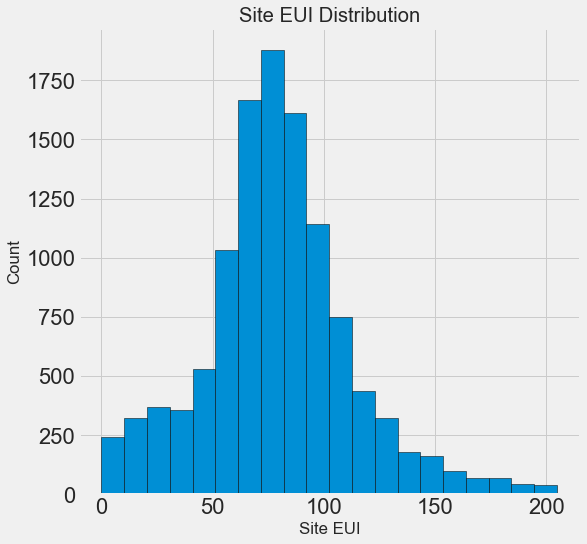

In [17]:
# Histogram Plot of Site EUI
figsize(8, 8)
plt.hist(data['Site EUI (kBtu/ft?)'].dropna(), bins=20, edgecolor='black');
plt.xlabel('Site EUI')
plt.ylabel('Count')
plt.title('Site EUI Distribution');

<h3>Looking for Relationships</h3>

In [18]:
# Create a list of buildings with more than 100 measurements
types = data.dropna(subset=['score'])
types = types['Largest Property Use Type'].value_counts()
types = list(types[types.values > 100].index)

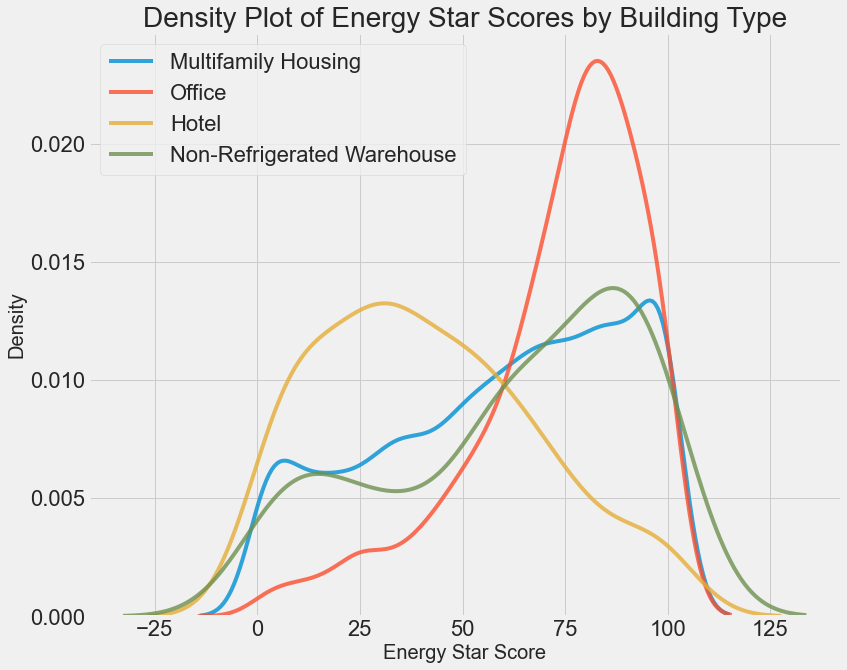

In [19]:
# Plot of distribution of scores for building categories
figsize(12, 10)

# Plot each building
for b_type in types:
    # Select the building type
    subset = data[data['Largest Property Use Type'] == b_type]

    # Density plot of Energy Star scores
    sns.kdeplot(subset['score'].dropna(), label=b_type, shade=False, alpha=0.8)

plt.xlabel('Energy Star Score', size = 20)
plt.ylabel('Density', size = 20)
plt.title('Density Plot of Energy Star Scores by Building Type', size = 28)
plt.legend();

In [20]:
# Create a list of boroughs with more than 100 observations
boroughs = data.dropna(subset=['score'])
boroughs = boroughs['Borough'].value_counts()
boroughs = list(boroughs[boroughs.values > 100].index)

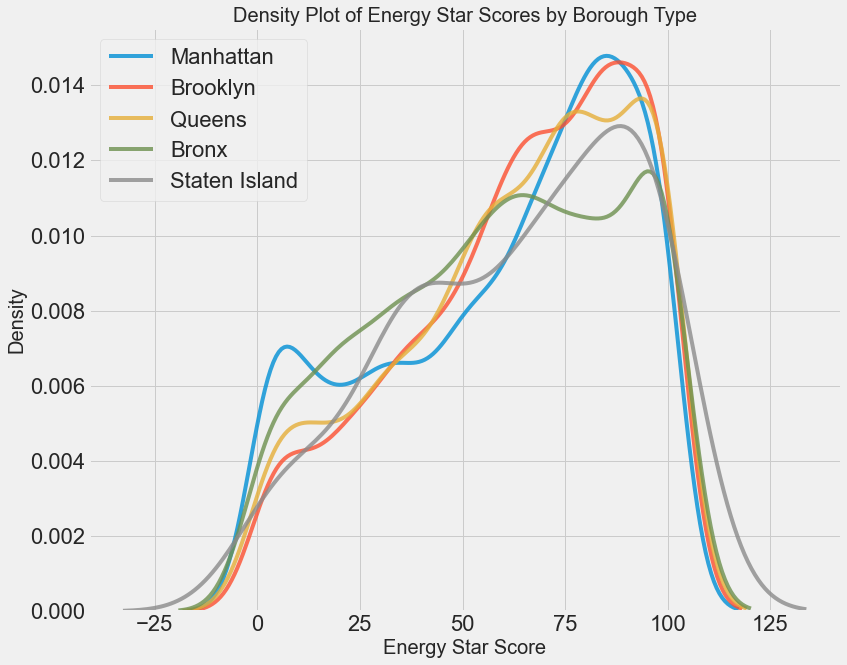

In [21]:
# Plot of Distribution of scores for boroughs
figsize(12, 10)

# Plot each borough distribution of score
for borough in boroughs:
    # Select the boroughs type
    subset = data[data['Borough'] == borough]

    # Density plot of Energy Star scores
    sns.kdeplot(subset['score'].dropna(), label=borough, shade=False, alpha=0.8);

plt.xlabel('Energy Star Score', size=20)
plt.ylabel('Density', size=20)
plt.title('Density Plot of Energy Star Scores by Borough Type', size=20)
plt.legend();

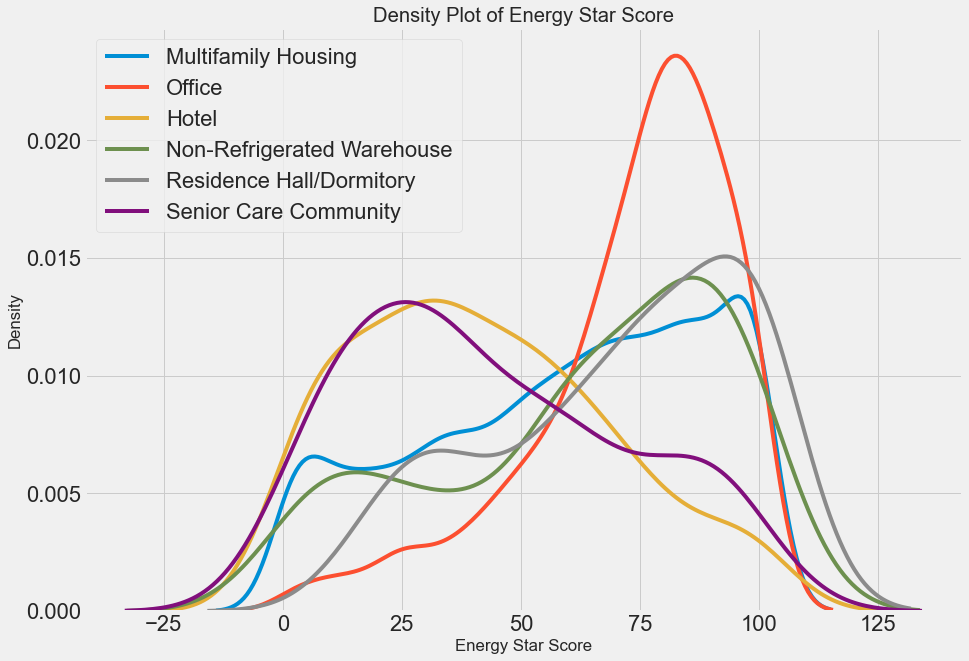

In [26]:
# Create a list fo buildings with more than 80 measurements
types = data.dropna(subset=['score'])
types = types['Primary Property Type - Self Selected'].value_counts()
types = list(types[types.values > 80].index)

figsize(14, 10)

# Plot each building
for b_type in types:
    # Select the building type
    subset = data[data['Primary Property Type - Self Selected'] == b_type]
    
    # Density plot of ENERGY Star scores
    sns.kdeplot(subset['score'].dropna(), label=b_type)

plt.xlabel('Energy Star Score')
plt.ylabel('Density')
plt.title('Density Plot of Energy Star Score');
plt.legend();

In [ ]:
# Create a list fo buildings with more than 80 measurements
types = data.dropna(subset=['ENERGY STAR Score'])
types = types['Primary Property Type - Self Selected'].value_counts()
types = list(types[types.values > 80].index)

figsize(14, 10)

# Plot each building
for b_type in types:
    # Select the building type
    subset = data[data['Primary Property Type - Self Selected'] == b_type]
    
    # Density plot of ENERGY Star scores
    sns.kdeplot(subset['ENERGY STAR Score'].dropna(), label=b_type);

plt.xlabel('Energy Star Score');
plt.ylabel('Density');
plt.title('Density Plot of Energy Star Score');

<h3>Correlations between Features and Target</h3>

In [ ]:
%%time
# Find all correlatinos and sort
correlations_data = data.corr()['score'].sort_values()
# Print the most negative correlations
print(correlations_data.head(15), '\n')
# Print the most positive correlations
print(correlations_data.tail(15))

In [ ]:
# Select the numeric columns
numeric_subset = data.select_dtypes('number')
# Create columns with square root and log of numeric columns
for col in numeric_subset.columns:
    # Skip the Energy Star Score column
    if col == 'score':
        next
    else:
        numeric_subset['sqrt_' + col] = np.sqrt(numeric_subset[col])
        numeric_subset['log_' + col] = np.log(numeric_subset[col])

# Select the categorical columns
categorical_subset = data[['Borough', 'Largest Property Use Type']]
# One-Hot encode
categorical_subset = pd.get_dummies(categorical_subset)
# Join the two dateframe using concat. Make sure to use axis=1 to perform a column bind
features = pd.concat([numeric_subset, categorical_subset], axis=1)
# Drop buildings without an energy star score
features = features.dropna(subset = ['score'])
# Find correlations with the score
correlations = features.corr()['score'].dropna().sort_values()

In [ ]:
correlations.head(15)

In [ ]:
correlations.tail(15) # Most positive correlations

In [ ]:
figsize(12, 10)
# Extract the building types
features['Largest Property Use Type'] = data.dropna(subset = ['score'])['Largest Property Use Type']
# Limit to building types with more than 100 observations (from previous code)
features = features[features['Largest Property Use Type'].isin(types)]
# Use seaborn to plot a scatterplot of Score vs Log Source EUI
sns.lmplot('Site EUI (kBtu/ft?)', 'score', hue='Largest Property Use Type', data=features, scatter_kws={'alpha': 0.8, 's': 60}, fit_reg=False, size=12, aspect=1.2)
# Plot labeling
plt.xlabel('Site EUI', size=28);
plt.ylabel('Energy Star Score', size=28);
plt.title('Energy Star Score vs Site EUI', size=36);

<h2>Feature Engineering and Selection</h2>

In [ ]:
# Copy the original data
features = data.copy()
# Select the numeric columns
numeric_subset = data.select_dtypes('number')
# Create columns with log of numeric columns
for col in numeric_subset.columns:
    # Skip the Energy Star Score column
    if col == 'score':
        next
    else:
        numeric_subset['log_' + col] = np.log(numeric_subset[col])
# Select the categorical columns
categorical_subset = data[['Borough', 'Largest Property Use Type']]
# One Hot encode
categorical_subset = pd.get_dummies(categorical_subset)
# Join the two dataframes using concat
features = pd.concat([numeric_subset, categorical_subset], axis=1)
features.shape

<h3>Remove Collinear Features</h3>

In [ ]:
plot_data = data[['Weather Normalized Site EUI (kBtu/ft?)', 'Site EUI (kBtu/ft?)']]

plt.plot(plot_data['Site EUI (kBtu/ft?)'], plot_data['Weather Normalized Site EUI (kBtu/ft?)'], 'bo')
plt.xlabel('Site EUI')
plt.ylabel('Weather Norm EUI')
corr_coeff =  np.corrcoef(data[['Weather Normalized Site EUI (kBtu/ft?)', 'Site EUI (kBtu/ft?)']].dropna(), rowvar=False)[0][1]
plt.title('Weather Norm EUI vs Site EUI, R = %0.4f' % corr_coeff);

In [ ]:
def remove_collinear_features(x, threshold):
    '''
    Objective:
        Remove collinear features in a dataframe with a correlation coefficient greater than the threshold(in our case > 0.6).
        Removing collinear features can help a model to generalize and improves the interpretability of the model.
    Input:
        threshold: any features with correlations greater than this value are removed
    Output:
        dataframe that contains only the non-highly-collinear features
    '''

    # Don't want to remove correlations between Energy Star Score
    y = x['score']
    x = x.drop(columns = ['score'])

    # Calculate the correlations matrix
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    # Iterate through the correlation matrix and compare correlations
    for i in iters:
        for j in range(i):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)

            # If correlation exceeds the threshold
            if (val >= threshold):
                # Appned the list correlation value
                drop_cols.append(col.values[0])

    # Drop one of each pair of correlated columns
    drops = set(drop_cols)
    x = x.drop(columns = drops)
    x = x.drop(columns = ['Weather Normalized Site EUI (kBtu/ft?)',
                          'Water Use (All Water Sources) (kgal)',
                          'log_Water Use (All Water Sources) (kgal)',
                          'Largest Property Use Type - Gross Floor Area (ft?)'])

    # Add the score back in to the data
    x['score'] = y

    return x

In [ ]:
# Remove the collinear features above a threshold = 0.6
features = remove_collinear_features(features, 0.6)

In [ ]:
features = features.dropna(axis=1, how='all')
features.shape

<h3>Split Inot Training and Testing Sets</h3>

In [ ]:
# Extract the buildings with no score and the buildings with a score
no_score = features[features['score'].isna()]
score = features[features['score'].notnull()]
print(no_score.shape)
print(score.shape)

In [ ]:
# Separate out the features and targets
features = score.drop(columns='score')
targets = pd.DataFrame(score['score'])

# Replace the inf and -inf with nan (required for later imputation)
features = features.replace({np.inf: np.nan, -np.inf: np.nan})

# Split into 70% training and 30% testing set
X, X_test, y, y_test = train_test_split(features, targets, test_size=0.3, random_state=42)

print(X.shape)
print(X_test.shape)
print(y.shape)
print(y_test.shape)

In [ ]:
# Function to calculate mean absolute error
def mae(y_true, y_pred):
    return np.mean(abs(y_true - y_pred))

In [ ]:
baseline_guess = np.median(y)
print('The baseline guess is a score of %0.2f' % baseline_guess)
print('Baseline Perfromance on the test set: MAE = %0.4f' % mae(y_test, baseline_guess));

In [52]:
# Save the no scores, training, and testing data
no_score.to_csv('data/no_score.csv', index=False)
X.to_csv('data/training_features.csv', index=False)
X_test.to_csv('data/testing_features.csv', index=False)
y.to_csv('data/training_labels.csv', index=False)
y_test.to_csv('data/testing_labels.csv', index=False)